# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [ ]:
NAME = "IAD32"
COLLABORATORS = "Marcin Słyś 408197, Michał Surówka 402299, Karol Śliwa 406441"

---

## Zestaw zadań 5: Weryfikacja hipotez statystycznych (Notatnik 2/2)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [2]:
# Dane do testów
x = sp.stats.norm.rvs(loc=10, scale=1.5, size=120, random_state=7)
y = sp.stats.norm.rvs(loc=0, scale=0.25, size=120, random_state=10) * x + 5
test_data_1 = pd.DataFrame(data=np.vstack([x, y]).T, columns=["x", "y"])
test_data_1.head()

,x,y
0,12.535789,9.173122
1,9.301094,6.663219
2,10.049230,1.117479
3,10.611274,4.977759
4,8.816615,6.369520


In [3]:
# Dane do testów
x = sp.stats.uniform.rvs(loc=0, scale=10, size=90, random_state=7)
y = 0.75*x  + sp.stats.norm.rvs(loc=0, scale=0.75, size=90, random_state=42) + 2
test_data_2 = pd.DataFrame(data=np.vstack([x, y]).T, columns=["x", "y"])
test_data_2.head()

,x,y
0,0.763083,2.944848
1,7.799188,7.745693
2,4.384092,5.773836
3,7.234652,8.568261
4,9.779895,9.159306


In [4]:
# Dane do testów
x = sp.stats.uniform.rvs(loc=0, scale=10, size=70, random_state=17)
y = x  + 1.25*np.sin(x) + sp.stats.norm.rvs(loc=1, scale=1.5, size=70, random_state=5)
test_data_3 = pd.DataFrame(data=np.vstack([x, y]).T, columns=["x", "y"])
test_data_3.head()

,x,y
0,2.946650,4.850629
1,5.305868,4.773312
2,1.915208,7.737958
3,0.679004,2.085888
4,7.869855,10.284112


### Zadanie 4: Weryfikacja hipotezy o wartości współczynnika prostej regresji [10 pkt]

Przygotuj funkcję `regression_coefficient_NHST()`, która będzie weryfikować hipotezę o wartości współczynnika równania regresji liniowej i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres zawierający:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wysokości 1/3 maksymalnej wartości funkcji gęstości prawdopodobieństwa wskazującą obliczoną wartość statystyki t.

Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartości wyznaczonych statystyk t i t_alpha,
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występująca w tytule informacja o testowanym współczynniku (a, b) oraz wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku t i t_alpha, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: a = 0.3`</br>
    `H1: a ≠ 0.3`</br>
    `t = 1.2140, t_alpha = 2.1448`</br>
    `|t| < t_alpha`</br>
    `Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>

In [5]:
def regression_coefficient_NHST(data, coef, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks oraz kolumny "x" i "y" z wynikami próby losowej.
    coef: str
        "a" lub "b" w zależności od testowanego współczynnika równania regresji.
    H0: float
        Wartość współczynnika przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość współczynnika jest różna od wartości przyjętej w H0,
        - less: wartość współczynnika jest mniejsza od wartości przyjętej w H0,
        - greater: wartość współczynnika jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    t: float
        Wyliczona na podstawie próby losowej wartość statystyki t.
    t_alpha: float
        Wartość statystyki t_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    n = len(data)
    lin = sp.stats.linregress(data.x,data.y)
    a = lin.slope
    b = lin.intercept
    Da = lin.stderr
    Db = lin.intercept_stderr
    
    x = np.linspace(sp.stats.t.ppf(0.0001, df=n - 1), sp.stats.t.ppf(0.9999, df=n - 1), 100)
    y = sp.stats.t.pdf(x, df=n - 1)
    fig, ax = plt.subplots(1,1, figsize=(15,10))
    fig.set_facecolor('white')
    ax.plot(x, y)
    

    if coef == "a":
        t = (a - H0) / Da
    elif coef == "b":
        t = (b - H0) / Db
        
    if H1 == "two-sided":
        t_alpha = sp.stats.t.ppf(1 - alpha/2, df=n - 2)
        H = int(abs(t) >= t_alpha)
        H1_str = 'H1: '+coef+' != '+str(H0)
        if H == 0:
            H_text = '|t| < t_alpha'
        else:
            H_text = '|t| >= t_alpha'
        ax.fill_between(x, 0, y, where=(x < -t_alpha) | (x > t_alpha), alpha=0.3, color='red')
    elif H1 == "less":
        t_alpha = sp.stats.t.ppf(alpha, df=n - 2)
        H = int(t <= t_alpha)
        H1_str = 'H1: '+coef+' < '+str(H0)
        if H == 0:
            H_text = 't > t_alpha'
        else:
            H_text = 't <= t_alpha'
        ax.fill_between(x, 0, y, where=(x < t_alpha), alpha=0.3, color='red')
    elif H1 == "greater":
        t_alpha = sp.stats.t.ppf(1 - alpha, df=n - 2)
        H = int(t >= t_alpha)
        H1_str = 'H1: '+coef+' > '+str(H0)
        if H == 0:
            H_text = 't < t_alpha'
        else:
            H_text = 't >= t_alpha'
        ax.fill_between(x, 0, y, where=(x > t_alpha), alpha=0.3, color='red')
    
    ax.vlines(x=t, ymin=0, ymax=1/3 * max(y), linestyle='--', color='darkred')
    if H == 0:
        result_text = "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = "+str(1 - alpha)
    else:
        result_text = "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = "+str(1 - alpha)
    
    ax.set_title("H0: "+coef+" = "+str(H0)+"\n"+H1_str+"\nt = "+format(t, "0.4f")+", t_alpha = "+format(t_alpha, "0.4f")+\
                "\n"+H_text+"\n"+result_text)
    
        
    return t, t_alpha, H

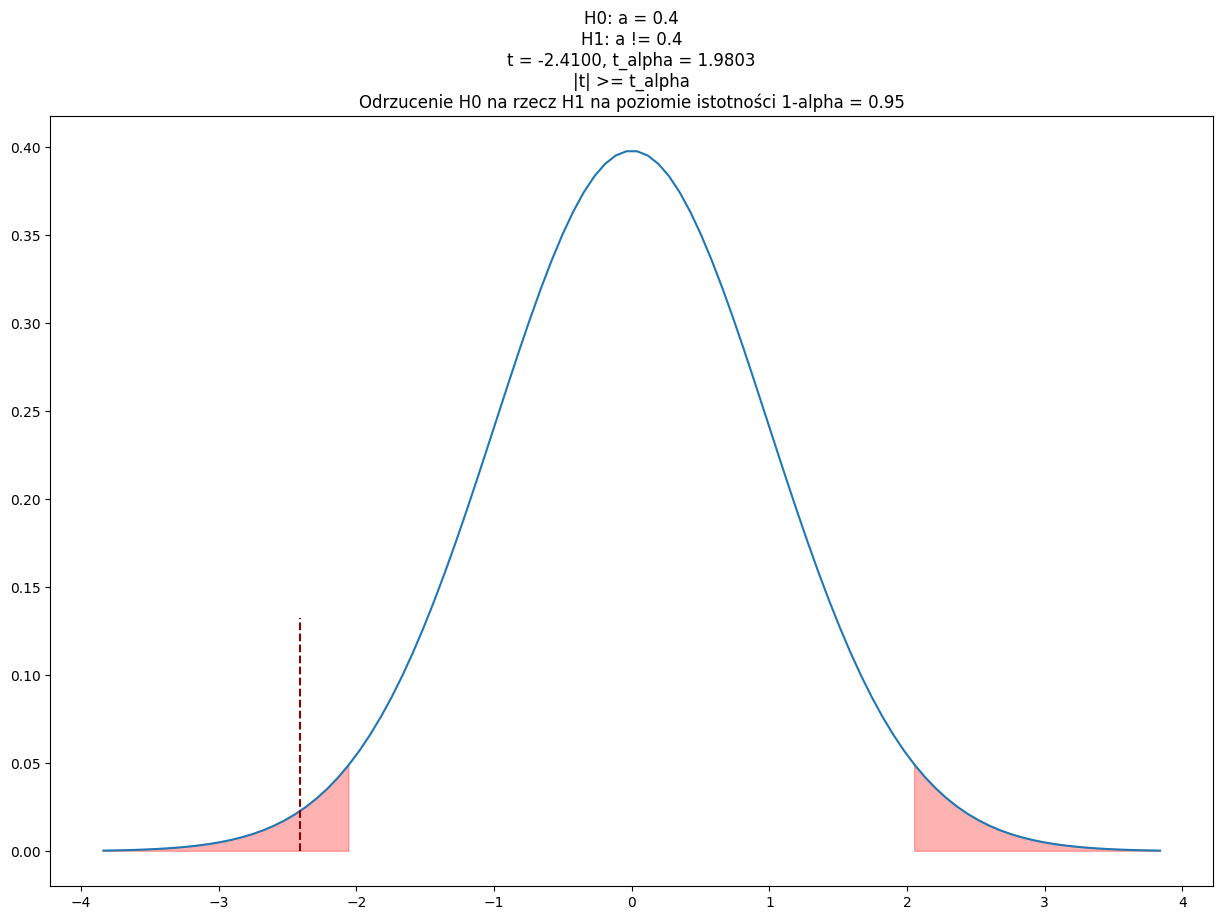

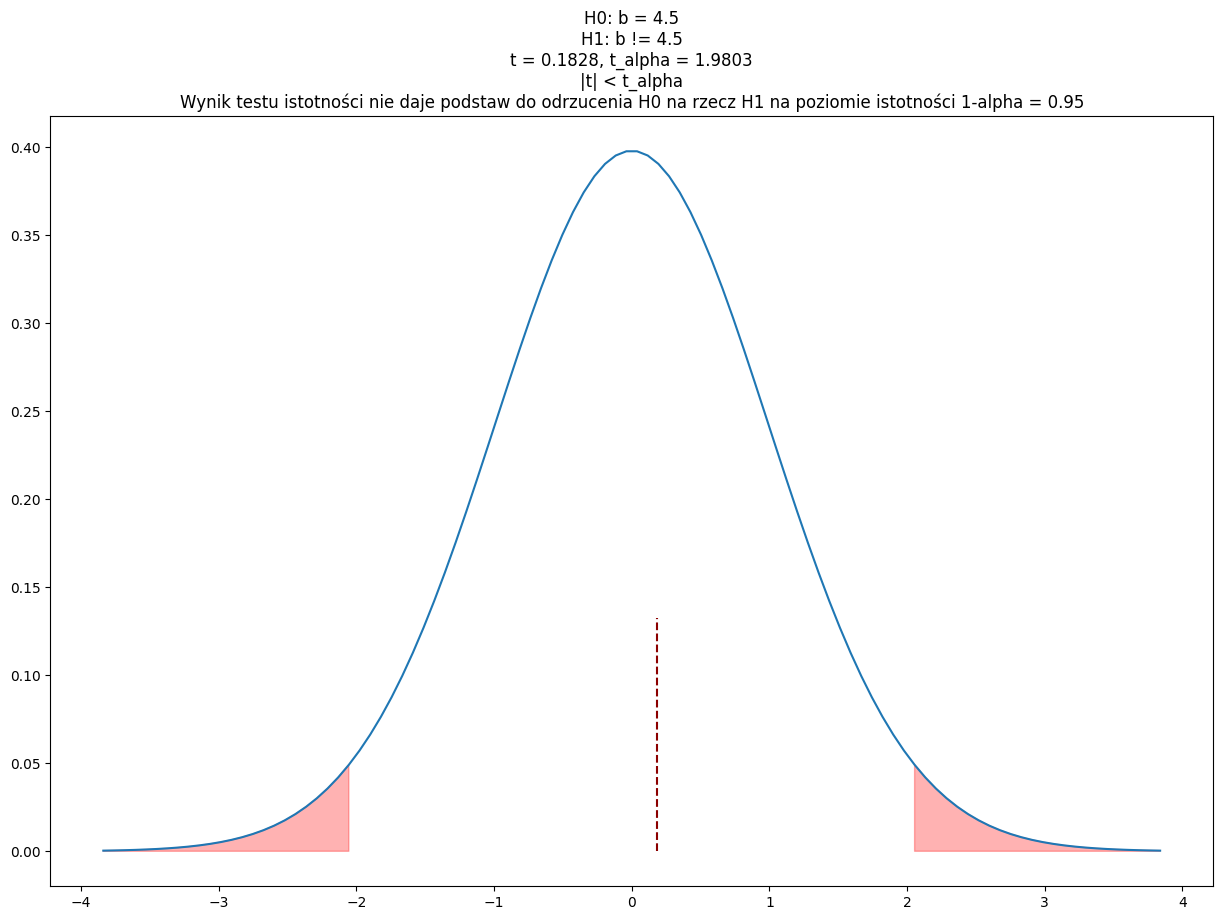

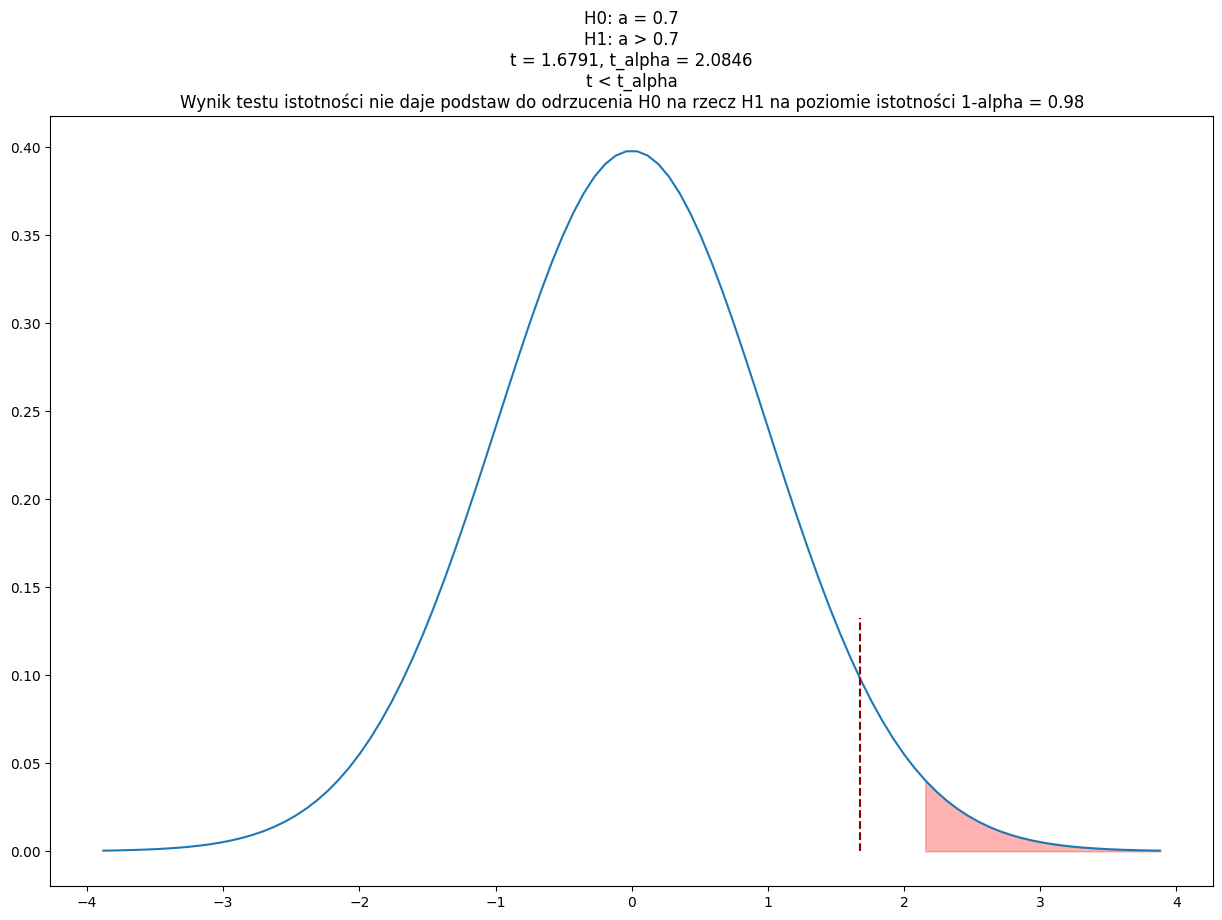

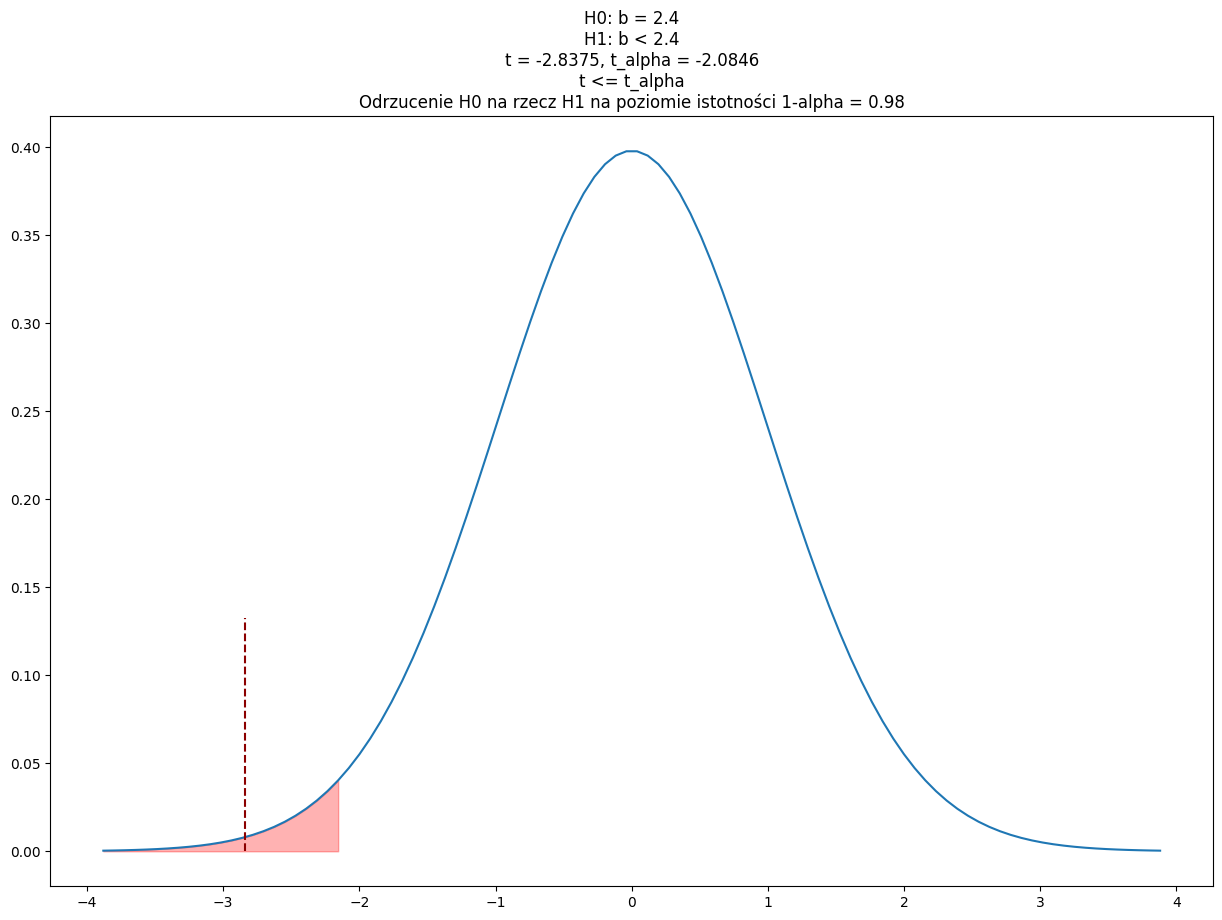

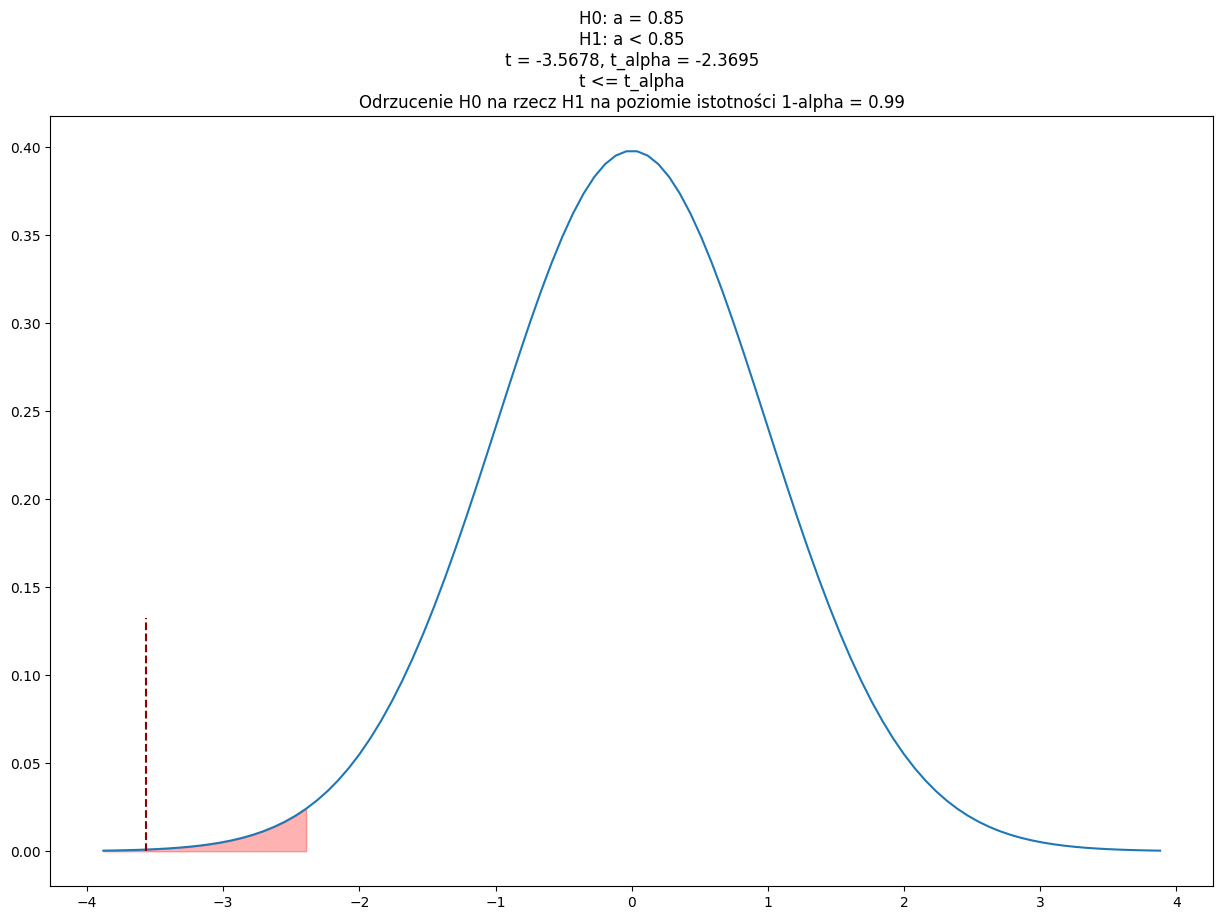

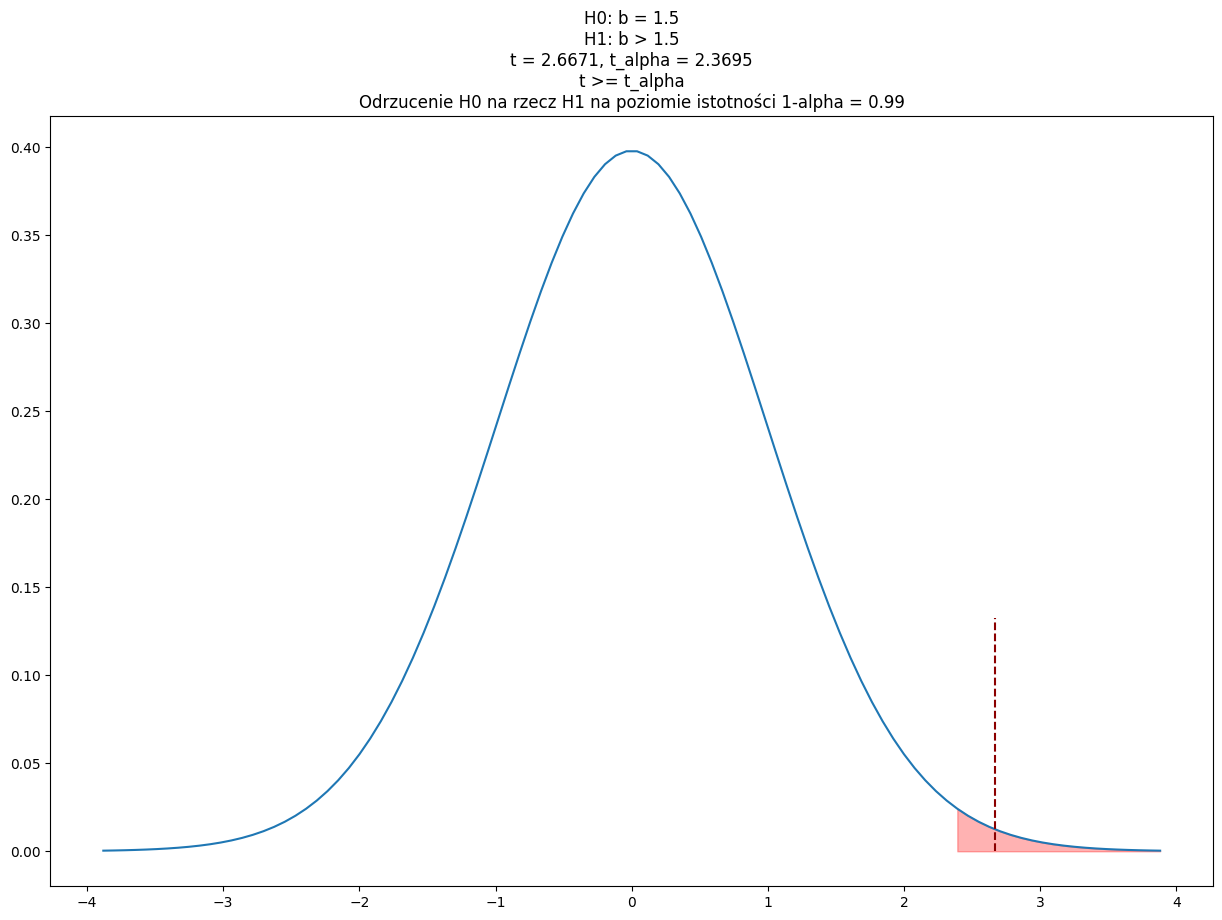

In [6]:
### Komórka testowa

assert np.all(np.isclose(regression_coefficient_NHST(test_data_1, "a", 0.4, "two-sided", 0.05), (-2.4099957692531735, 1.9802722492407059, 1)))
assert np.all(np.isclose(regression_coefficient_NHST(test_data_1, "b", 4.5, "two-sided", 0.05), (0.18283553669953134, 1.9802722492407059, 0)))
assert np.all(np.isclose(regression_coefficient_NHST(test_data_2, "a", 0.7, "greater", 0.02), (1.6790640072789238, 2.084638091603984, 0)))
assert np.all(np.isclose(regression_coefficient_NHST(test_data_2, "b", 2.4, "less", 0.02), (-2.8374847222952546, -2.084638091603984, 1)))
assert np.all(np.isclose(regression_coefficient_NHST(test_data_2, "a", 0.85, "less", 0.01), (-3.56782781135344, -2.369472273998314, 1)))
assert np.all(np.isclose(regression_coefficient_NHST(test_data_2, "b", 1.5, "greater", 0.01), (2.667124457352881, 2.3694722739983134, 1)))

### Zadanie 5: Weryfikacja hipotezy o losowości próby (test serii) [10 pkt]

Przygotuj funkcję `sample_randomness_NHST()`, która będzie weryfikować hipotezę o losowości próby i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna ona generować wykres zawierający:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wysokości 1/3 maksymalnej wartości funkcji gęstości prawdopodobieństwa wskazującą obliczoną wartość statystyki u.

Tytuł wykresu powinien zawierać w kolejnych liniach informację o:
- postaci hipotezy zerowej,
- postaci hipotezy alternatywnej,
- wartości wyznaczonych statystyk u i u_alpha,
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występujące w tytule wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku u i u_alpha, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu zawartego w tytule figury:</br>
    `H0: Dobór jednostek do próby jest losowy`</br>
    `H1: Dobór jednostek do próby nie jest losowy`</br>
    `u = 1.3462, u_alpha = 1.6449`</br>
    `|u| < u_alpha`</br>
    `Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95`</br>

In [7]:
def sample_randomness_NHST(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks oraz kolumny "x" i "y" z wynikami próby.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    u: float
        Wyliczona na podstawie próby wartość statystyki u.
    u_alpha: float
        Wartość statystyki u_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    data_sorted = data.sort_values(by='x').reset_index(drop=True)
    data_x = data_sorted.x
    data_y = data_sorted.y
    lin = sp.stats.linregress(data_x,data_y)
    a = lin.slope
    b = lin.intercept
    
    y_new  = a*data_x + b
    
    tab = []
    for i in range(len(data_x)):
        res = data_y[i] - y_new[i]
        if res > 0:
            tab.append('a')
        elif res < 0:
            tab.append('b')
    k = 1
    actual = tab[0]
    for i in range(1, len(tab)):
        if tab[i] != actual:
            k += 1
            actual = tab[i]

    n = len(tab)
    na = sum(np.array(tab) == 'a')
    nb = sum(np.array(tab) == 'b')
    
    k_ = 2*na*nb/n + 1
    sk2 = 2*na*nb*(2*na*nb - n) / (n*n*(n-1))
    u = (k - k_) / np.sqrt(sk2)
    
    x = np.linspace(sp.stats.norm.ppf(0.0001), sp.stats.norm.ppf(0.9999), 100)
    y = sp.stats.norm.pdf(x)
    
    fig, ax = plt.subplots(1,1, figsize=(15,10))
    fig.set_facecolor('white')
    ax.plot(x, y)
    
    u_alpha = sp.stats.norm.ppf(1 - alpha/2)
    H = int(abs(u) >= u_alpha)
    if H == 0:
        H_text = '|u| < u_alpha'
    else:
        H_text = '|u| >= u_alpha'
    ax.fill_between(x, 0, y, where=(x < -u_alpha) | (x > u_alpha), alpha=0.3, color='red')
    
    ax.vlines(x=u, ymin=0, ymax=1/3 * max(y), linestyle='--', color='darkred')
    if H == 0:
        result_text = "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = "+str(1 - alpha)
    else:
        result_text = "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = "+str(1 - alpha)\
    
    ax.set_title("H0: Dobór jednostek do próby jest losowy\nH1: Dobór jednostek do próby nie jest losowy\nu = "+format(u, "0.4f")+", u_alpha = "+format(u_alpha, "0.4f")+\
                "\n"+H_text+"\n"+result_text)
    
    return u, u_alpha, H

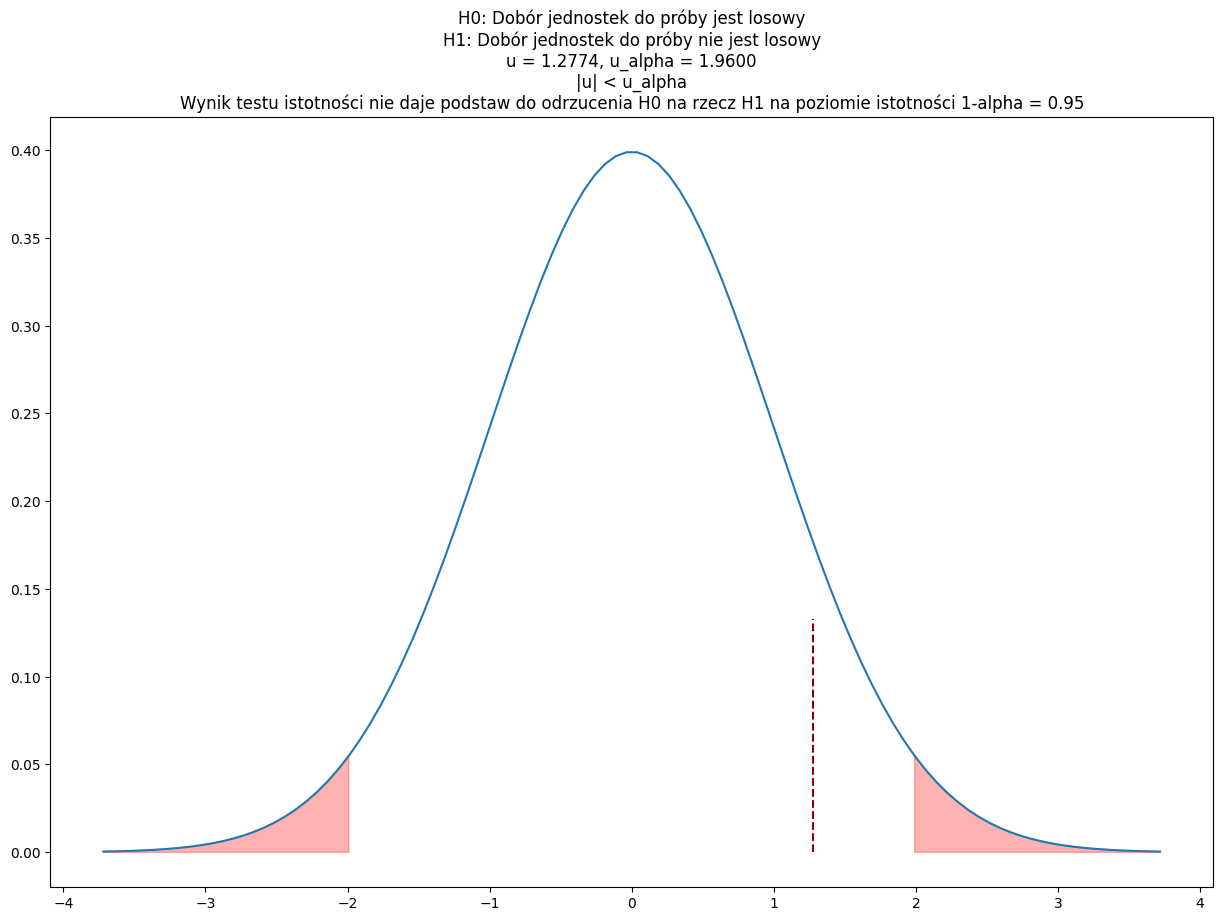

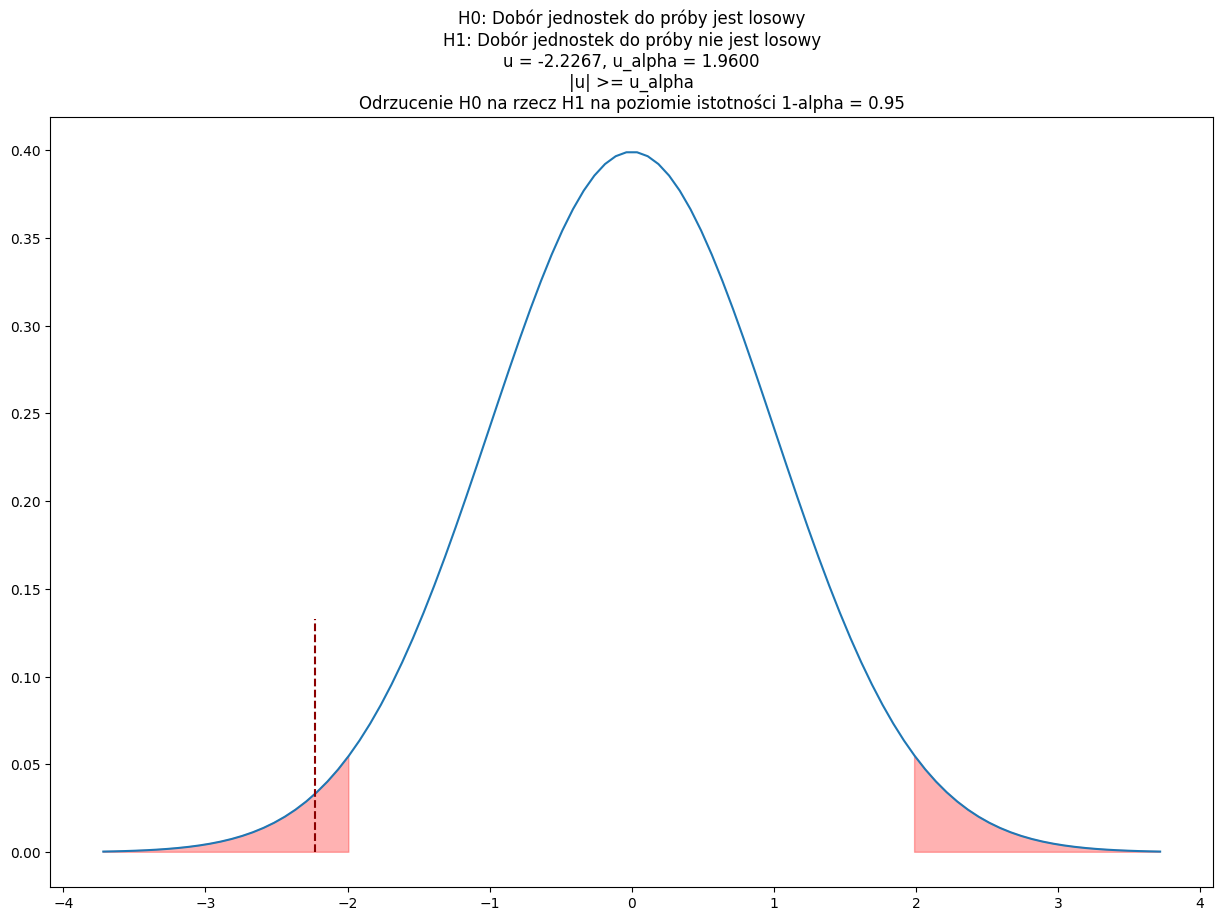

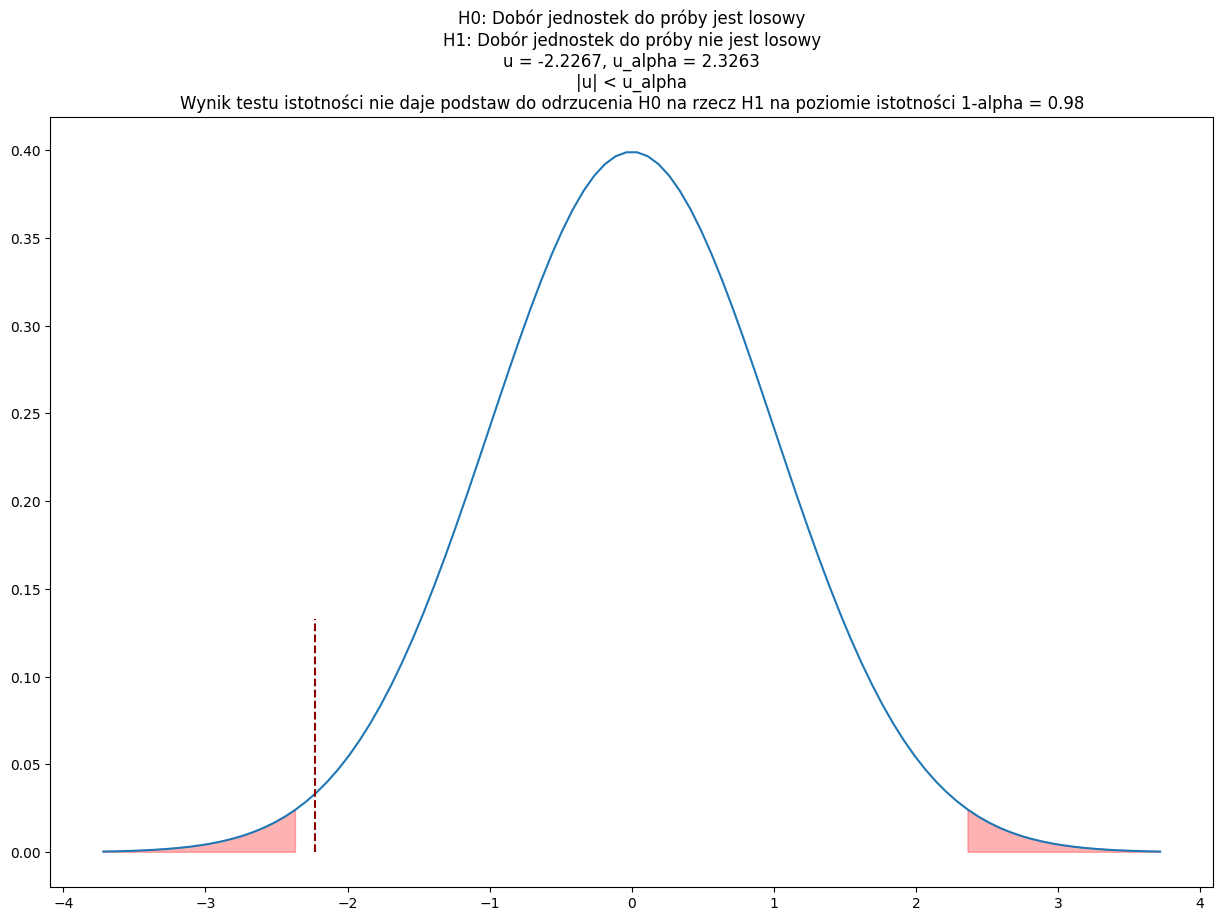

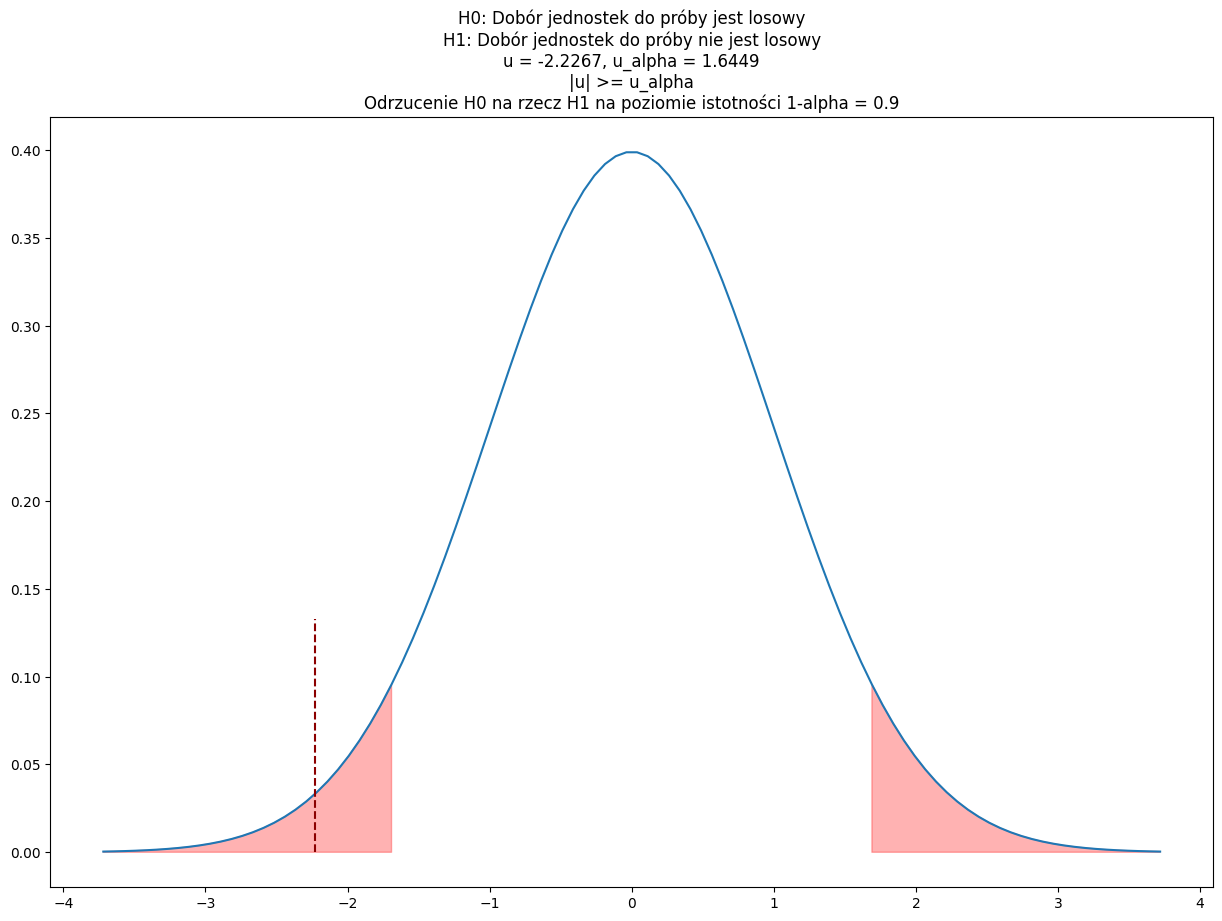

In [8]:
### Komórka testowa

assert np.all(np.isclose(sample_randomness_NHST(test_data_2, 0.05), (1.2774271521862057, 1.959963984540054, 0)))
assert np.all(np.isclose(sample_randomness_NHST(test_data_3, 0.05), (-2.2266930916721734, 1.959963984540054, 1)))
assert np.all(np.isclose(sample_randomness_NHST(test_data_3, 0.02), (-2.2266930916721734, 2.3263478740408408, 0)))
assert np.all(np.isclose(sample_randomness_NHST(test_data_3, 0.1), (-2.2266930916721734, 1.6448536269514722, 1)))